In [1]:
!curl https://topcs.blob.core.windows.net/public/FlightData.csv -o flightdata.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:02 --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:03 --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:04 --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:05 --:--:--     0
  1 1552k    1 15978    0     0   2572      0  0:10:18  0:00:06  0:10:12  3131
  1 1552k    1 15978    0     0   2207      0  0:12:00  0:00:07  0:11:53  3123
  2 1552k    2 32362    0     0   3955      0  0:06:42  0:00:08  0:06:34  6428
  3 1552k    3 48746    0     0   5422      0  0:04:53  0:00:08  0:04:45 10395
  6 1552k    6 97898    0     0   9800      0  0:02

In [3]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df=pd.read_csv("flightdata.csv")

In [5]:
df.head()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,UNIQUE_CARRIER,TAIL_NUM,FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,...,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DEL15,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE,Unnamed: 25
0,2016,1,1,1,5,DL,N836DN,1399,10397,ATL,...,2143,2102.0,-41.0,0.0,0.0,0.0,338.0,295.0,2182.0,NaN
1,2016,1,1,1,5,DL,N964DN,1476,11433,DTW,...,1435,1439.0,4.0,0.0,0.0,0.0,110.0,115.0,528.0,NaN
2,2016,1,1,1,5,DL,N813DN,1597,10397,ATL,...,1215,1142.0,-33.0,0.0,0.0,0.0,335.0,300.0,2182.0,NaN
3,2016,1,1,1,5,DL,N587NW,1768,14747,SEA,...,1335,1345.0,10.0,0.0,0.0,0.0,196.0,205.0,1399.0,NaN
4,2016,1,1,1,5,DL,N836DN,1823,14747,SEA,...,607,615.0,8.0,0.0,0.0,0.0,247.0,259.0,1927.0,NaN


In [6]:
df.shape

(11231, 26)

In [7]:
df.isnull().any()

YEAR                   False
QUARTER                False
MONTH                  False
DAY_OF_MONTH           False
DAY_OF_WEEK            False
UNIQUE_CARRIER         False
TAIL_NUM               False
FL_NUM                 False
ORIGIN_AIRPORT_ID      False
ORIGIN                 False
DEST_AIRPORT_ID        False
DEST                   False
CRS_DEP_TIME           False
DEP_TIME                True
DEP_DELAY               True
DEP_DEL15               True
CRS_ARR_TIME           False
ARR_TIME                True
ARR_DELAY               True
ARR_DEL15               True
CANCELLED              False
DIVERTED               False
CRS_ELAPSED_TIME       False
ACTUAL_ELAPSED_TIME     True
DISTANCE               False
Unnamed: 25             True
dtype: bool

In [8]:
df.isnull().sum()

YEAR                       0
QUARTER                    0
MONTH                      0
DAY_OF_MONTH               0
DAY_OF_WEEK                0
UNIQUE_CARRIER             0
TAIL_NUM                   0
FL_NUM                     0
ORIGIN_AIRPORT_ID          0
ORIGIN                     0
DEST_AIRPORT_ID            0
DEST                       0
CRS_DEP_TIME               0
DEP_TIME                 107
DEP_DELAY                107
DEP_DEL15                107
CRS_ARR_TIME               0
ARR_TIME                 115
ARR_DELAY                188
ARR_DEL15                188
CANCELLED                  0
DIVERTED                   0
CRS_ELAPSED_TIME           0
ACTUAL_ELAPSED_TIME      188
DISTANCE                   0
Unnamed: 25            11231
dtype: int64

In [9]:
df = df.drop('Unnamed: 25', axis=1)
df.isnull().sum()

YEAR                     0
QUARTER                  0
MONTH                    0
DAY_OF_MONTH             0
DAY_OF_WEEK              0
UNIQUE_CARRIER           0
TAIL_NUM                 0
FL_NUM                   0
ORIGIN_AIRPORT_ID        0
ORIGIN                   0
DEST_AIRPORT_ID          0
DEST                     0
CRS_DEP_TIME             0
DEP_TIME               107
DEP_DELAY              107
DEP_DEL15              107
CRS_ARR_TIME             0
ARR_TIME               115
ARR_DELAY              188
ARR_DEL15              188
CANCELLED                0
DIVERTED                 0
CRS_ELAPSED_TIME         0
ACTUAL_ELAPSED_TIME    188
DISTANCE                 0
dtype: int64

In [10]:
df = df[["MONTH", "DAY_OF_MONTH", "DAY_OF_WEEK", "ORIGIN", "DEST", "CRS_DEP_TIME", "ARR_DEL15"]]
df.isnull().sum()

MONTH             0
DAY_OF_MONTH      0
DAY_OF_WEEK       0
ORIGIN            0
DEST              0
CRS_DEP_TIME      0
ARR_DEL15       188
dtype: int64

In [11]:
df=df.fillna({'ARR_DEL15':1})

In [12]:
df.isnull().sum()

MONTH           0
DAY_OF_MONTH    0
DAY_OF_WEEK     0
ORIGIN          0
DEST            0
CRS_DEP_TIME    0
ARR_DEL15       0
dtype: int64

In [13]:
df=pd.get_dummies(df,columns=['ORIGIN','DEST'])

In [14]:
df.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,CRS_DEP_TIME,ARR_DEL15,ORIGIN_ATL,ORIGIN_DTW,ORIGIN_JFK,ORIGIN_MSP,ORIGIN_SEA,DEST_ATL,DEST_DTW,DEST_JFK,DEST_MSP,DEST_SEA
0,1,1,5,1905,0.0,1,0,0,0,0,0,0,0,0,1
1,1,1,5,1345,0.0,0,1,0,0,0,0,0,0,1,0
2,1,1,5,940,0.0,1,0,0,0,0,0,0,0,0,1
3,1,1,5,819,0.0,0,0,0,0,1,0,0,0,1,0
4,1,1,5,2300,0.0,0,0,0,0,1,0,1,0,0,0


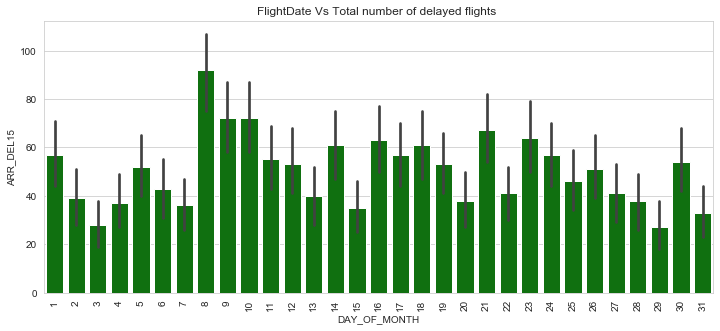

In [16]:
import seaborn as sns
import numpy as np
sns.set_style('whitegrid')
plt.figure(figsize=(12, 5))
order = np.unique(list(df['DAY_OF_MONTH']))
ax = sns.barplot(x='DAY_OF_MONTH',y ='ARR_DEL15', data=df, color = "green" , order = order , estimator = np.sum)
plt.xticks(rotation=90)
fig = plt.title("FlightDate Vs Total number of delayed flights ")

The total number of delays and average delay per day seems to follow a common pattern 

In [45]:
features = []
for i in df.columns:
    if i != "ARR_DEL15":
        features.append(i)

In [46]:
len(features)

14

In [48]:
mask=np.ones(df.shape[0], dtype='int')
mask[itrain]=1
mask[itest]=0
mask = (mask==1)

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train,X_test,y_train,y_test=train_test_split(df.drop('ARR_DEL15',axis=1),df['ARR_DEL15'],test_size=0.2,random_state=42)

In [23]:
print('X_train',X_train.shape,"\n")
print('X_test',X_test.shape)

X_train (8984, 14) 

X_test (2247, 14)


In [30]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()

In [31]:
model.fit(X_train,y_train)

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [32]:
predicted=model.predict(X_test)
predicted

array([0., 0., 0., ..., 0., 0., 0.])

In [34]:
# Creating a classification report for this Random Forest

from sklearn.metrics import classification_report
print (classification_report(y_test,predicted))

              precision    recall  f1-score   support

         0.0       0.87      0.98      0.92      1936
         1.0       0.44      0.12      0.19       311

    accuracy                           0.86      2247
   macro avg       0.65      0.55      0.55      2247
weighted avg       0.81      0.86      0.82      2247



In [36]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()

In [38]:
# Creating a classification report for this decision tree
clf.fit(X_train,y_train)
print (classification_report(y_test,clf.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.89      0.85      0.87      1936
         1.0       0.28      0.35      0.31       311

    accuracy                           0.78      2247
   macro avg       0.58      0.60      0.59      2247
weighted avg       0.81      0.78      0.79      2247



In [50]:
model.score(X_test,y_test)

0.8566978193146417

In [51]:
from sklearn.metrics import roc_auc_score

In [52]:
probabilities=model.predict(X_test)

In [53]:
roc_auc_score(y_test,probabilities)

0.5470888363317478

In [54]:
from sklearn.metrics import confusion_matrix,precision_score,roc_curve
confusion_matrix(y_test,predicted)

array([[1888,   48],
       [ 274,   37]], dtype=int64)

In [80]:
import matplotlib.pyplot as plt

In [55]:
fpr,tpr,_=roc_curve(y_test,probabilities)

Text(0, 0.5, 'tpr')

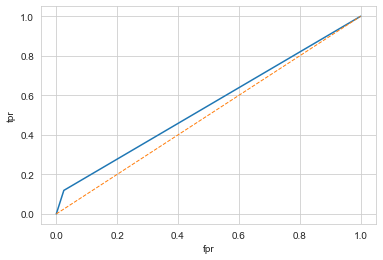

In [56]:
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],lw=1,linestyle='--')
plt.xlabel('fpr')
plt.ylabel('tpr')

In [57]:
def predict_delay(departure_date_time, origin, destination):
    from datetime import datetime

    try:
        departure_date_time_parsed = datetime.strptime(departure_date_time, '%d/%m/%Y %H:%M:%S')
    except ValueError as e:
        return 'Error parsing date/time - {}'.format(e)

    month = departure_date_time_parsed.month
    day = departure_date_time_parsed.day
    day_of_week = departure_date_time_parsed.isoweekday()
    hour = departure_date_time_parsed.hour

    origin = origin.upper()
    destination = destination.upper()

    input = [{'MONTH': month,
              'DAY': day,
              'DAY_OF_WEEK': day_of_week,
              'CRS_DEP_TIME': hour,
              'ORIGIN_ATL': 1 if origin == 'ATL' else 0,
              'ORIGIN_DTW': 1 if origin == 'DTW' else 0,
              'ORIGIN_JFK': 1 if origin == 'JFK' else 0,
              'ORIGIN_MSP': 1 if origin == 'MSP' else 0,
              'ORIGIN_SEA': 1 if origin == 'SEA' else 0,
              'DEST_ATL': 1 if destination == 'ATL' else 0,
              'DEST_DTW': 1 if destination == 'DTW' else 0,
              'DEST_JFK': 1 if destination == 'JFK' else 0,
              'DEST_MSP': 1 if destination == 'MSP' else 0,
              'DEST_SEA': 1 if destination == 'SEA' else 0 }]

    return model.predict_proba(pd.DataFrame(input))[0][0]

In [58]:
predict_delay('1/10/2018 21:45:00', 'JFK', 'ATL')

0.8

In [59]:
predict_delay('2/10/2018 10:00:00', 'ATL', 'SEA')

0.9

In [60]:
import numpy as np

Text(0, 0.5, 'probability of on time arrival')

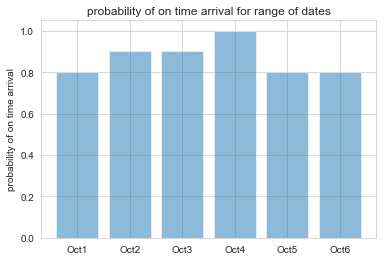

In [61]:
labels=('Oct1','Oct2','Oct3','Oct4','Oct5','Oct6')
values=(predict_delay('1/10/2020 21:45:00','JFK','ATL'),
       predict_delay('2/10/2020 21:45:00','JFK','ATL'),
       predict_delay('3/10/2020 21:45:00','JFK','ATL'),
       predict_delay('4/10/2020 21:45:00','JFK','ATL'),
       predict_delay('5/10/2020 21:45:00','JFK','ATL'),
       predict_delay('6/10/2020 21:45:00','JFK','ATL'))
alabels=np.arange(len(labels))
plt.bar(alabels, values, align='center', alpha=0.5)
plt.xticks(alabels,labels)
plt.title("probability of on time arrival for range of dates")
plt.ylabel("probability of on time arrival")